In [83]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdChemReactions, QED
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
Draw.rdDepictor.SetPreferCoordGen(True)
IPythonConsole.molSize = 1000,1000
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = True

In [84]:
macrocycle = "O=C1CCCNC([C@@H](NC(CN2CCN(C([C@@H](CNC(CC3=CC=C(S(=O)(F)=O)C=C3)=O)NC([C@@H](CC4=CN=CC=C4)N1)=O)=O)CC2)=O)C(C)(C)C)=O"

In [85]:
mol = Chem.MolFromSmiles(macrocycle)

0 49 44


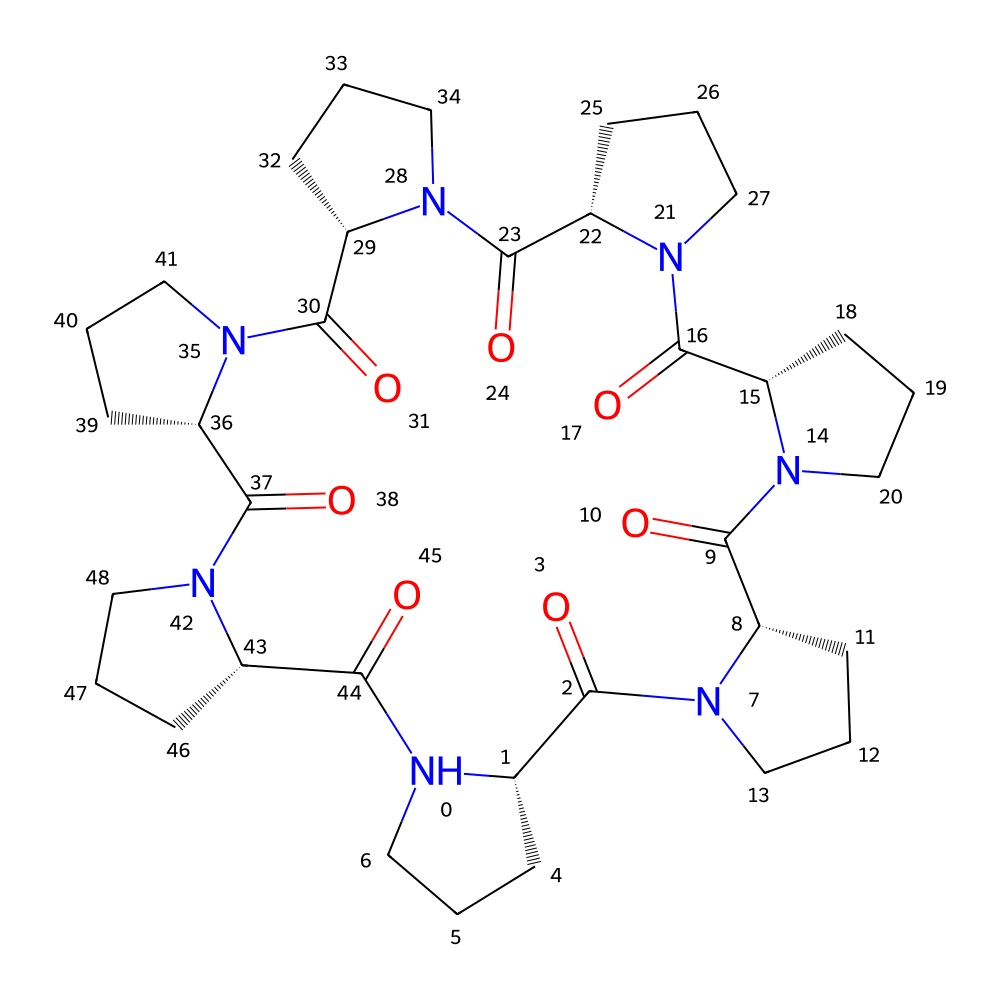

In [86]:
def peptide_cyclization(molecule):
    molecule = Chem.Mol(molecule)
    molecule = Chem.RemoveAllHs(molecule)


    # In the case of know NH2 group - find the index of NH
    try:
        amine_pattern = Chem.MolFromSmarts('[N;H2]')
        amine_index = molecule.GetSubstructMatches(amine_pattern)[0][0]
    except(IndexError):
        amine_pattern = Chem.MolFromSmarts('[N;H1]')
        amine_index = molecule.GetSubstructMatches(amine_pattern)[0][0]

    # Hydroxyl index must lie within a known carboxyl index
    hydroxyl_pattern = Chem.MolFromSmarts('[O;H1]')
    carboxyl_pattern = Chem.MolFromSmarts("[C,c;X3](=[O,S,P])-[O;H1]")
    carboxyl_indexes = []
    for match in molecule.GetSubstructMatches(carboxyl_pattern):
        for idx in match:
            carboxyl_indexes.append(idx)

    hydroxyl_index = molecule.GetSubstructMatches(hydroxyl_pattern)
    for match in hydroxyl_index:
        if match[0] in carboxyl_indexes:
            hydroxyl_index = match[0]
            break
        else:
            continue 

    # Get the atom of known index
    carboxyl_carbon_index = molecule.GetAtomWithIdx(hydroxyl_index).GetNeighbors()[0].GetIdx()

    print(amine_index, hydroxyl_index, carboxyl_carbon_index)

    mw = Chem.RWMol(molecule)

    mw.RemoveAtom(hydroxyl_index)

    mw.AddBond(amine_index,carboxyl_carbon_index,Chem.BondType.SINGLE)

    return Chem.Mol(mw)



peptide_cyclization(Chem.MolFromSequence("PPPPPPP"))


((7, 8, 9),)
[7, 8, 9]


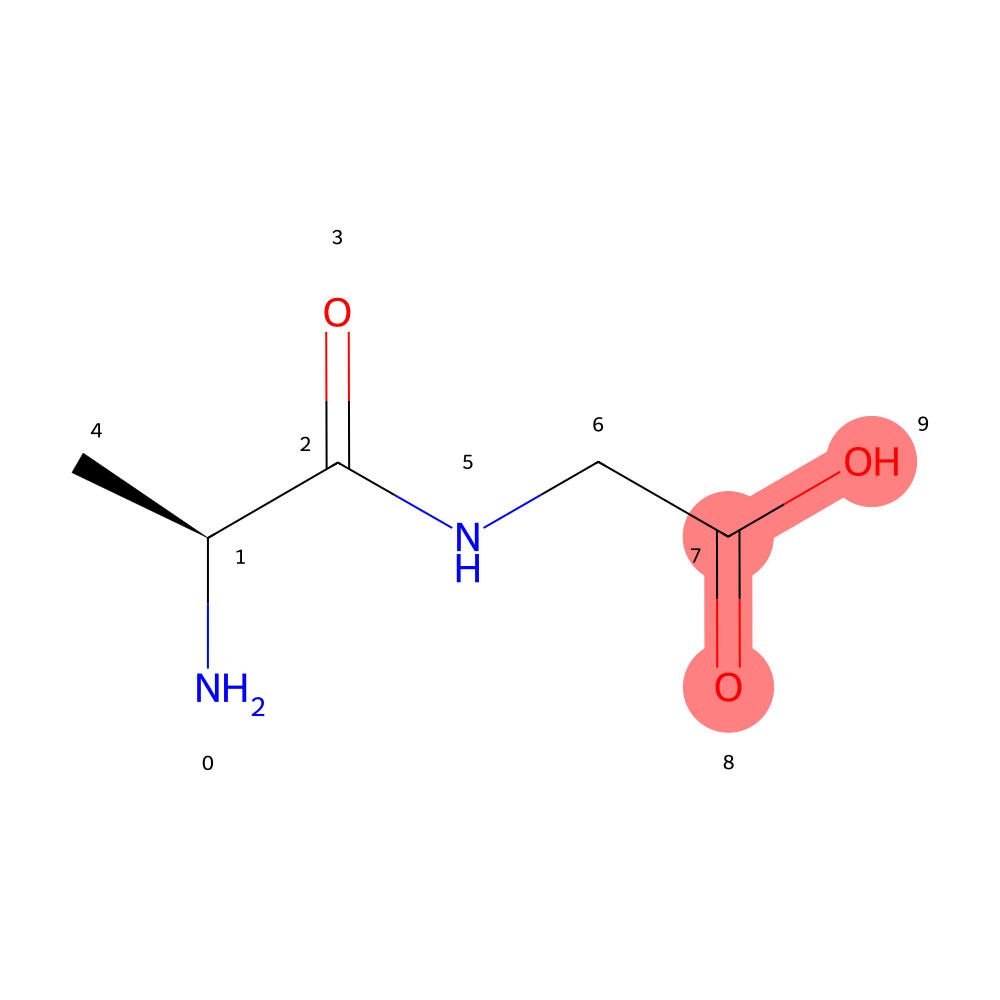

In [87]:
residue = Chem.MolFromSequence("AG")
pattern = Chem.MolFromSmarts("[C,c;X3](=[O,S,P])-[O;H1]")
print(residue.GetSubstructMatches(pattern))


carboxyl_indexes = []
for match in residue.GetSubstructMatches(pattern):
    for idx in match:
        carboxyl_indexes.append(idx)
print(carboxyl_indexes)
display(residue)